# Project: NFL Team Attendance Variety and Influencing Factors
# Part2: Analysis

In [1]:
import pandas as pd

# Adjustments to the DataFrame
- add stadium_capacity to show the stadium capacity for each team.<br>
  Mainly import the data from [stadium comparison](https://www.stadiumsofprofootball.com/comparisons/). For those that moved to different stadiums, used google to fill in the missing values.
- add new columns to show the average home attendance and average home attendance rate.
- convert the 'renovated' values to 0 and 1. Value equals 1 means the stadium is renovated that year, 0 means that the stadium is not renovated that year.

In [2]:
# import the clean_data from part1
clean_data = pd.read_csv('clean_data.csv')
clean_data.head()
# import the stadium_comparison_clean from part1
stadiums = pd.read_csv('stadium_comparison_clean.csv')

# create a temporary DataFrame with only the columns needed
stadiums_capacities = stadiums[['team_name', 'capacity', 'year_opened']]

# merge the two dataframes to add the stadium capacity to the clean_data
merged = pd.merge(clean_data, stadiums_capacities, on='team_name', how='left')
merged.head()

# rename the columns
merged = merged.rename(columns={'capacity': 'stadium_capacity', 'year_opened': 'stadium_open_year'})

# set the capacity to None if the stadium_open_year is after the year of the game
merged['stadium_capacity'] = merged.apply(lambda x: x['stadium_capacity'] if x['stadium_open_year'] <= x['year'] else None, axis=1)

In [3]:
# show each team's None values in the stadium_capacity column
No_capacity = merged[merged['stadium_capacity'].isnull()][['team_name', 'year', 'stadium_open_year', 'stadium_capacity']]
# export the DataFrame to a csv file
No_capacity.to_csv('No_capacity.csv', index=False)

# fill in the None values with the previous capacity of the stadiums manually
# save the DataFrame with previous capacity
previous_capacity = pd.read_csv('previous_capacity.csv')
# drop the stadium_open_year column
previous_capacity = previous_capacity.drop(columns=['stadium_open_year'])
previous_capacity.head(10)
# convert the stadium_capacity column to integer
previous_capacity['stadium_capacity'] = previous_capacity['stadium_capacity'].str.replace(',', '').astype(int)

In [4]:
# merge the two dataframes
final_dataset = pd.merge(merged, previous_capacity, on=['team_name', 'year'], how='left')
# fill the missing values in the stadium_capacity column with the values from the previous_capacity column
final_dataset['stadium_capacity_x'] = final_dataset['stadium_capacity_x'].fillna(final_dataset['stadium_capacity_y'])

# drop the unnecessary columns and rename the columns
final_dataset = final_dataset.drop(columns=['stadium_capacity_y','stadium_open_year', 'stadium_open_year', 'stadium_renovation_year'])
final_dataset = final_dataset.rename(columns={'stadium_capacity_x': 'stadium_capacity'})
final_dataset = final_dataset.rename(columns={'total': 'total_attendance'})

# convert the renovated column to 0 and 1
final_dataset['renovated'] = final_dataset['renovated'].apply(lambda x: 1 if x == True else 0)

# calculate the average home attendance and the average home attendance rate
final_dataset['home_attendance_per_game'] = final_dataset['home_attendance']/8
final_dataset['home_attendance_rate_per_game'] = final_dataset['home_attendance_per_game']/final_dataset['stadium_capacity']

# drop the total_attendance column and away_attendance column
final_dataset = final_dataset.drop(columns=['total_attendance', 'away_attendance'])


In [5]:
final_dataset.head()

,team,team_name,year,home_attendance,wins,loss,playoffs,superbowl_winner,win_percentage,state,county,gdp_chained_million$,renovated,stadium_capacity,home_attendance_per_game,home_attendance_rate_per_game
0,Arizona,Cardinals,2001,307315,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0,0,73379.0,38414.375,0.523506
1,Arizona,Cardinals,2002,327272,5,11,No Playoffs,0,0.31,Arizona,Maricopa,150559.0,0,73379.0,40909.000,0.557503
2,Arizona,Cardinals,2003,288499,4,12,No Playoffs,0,0.25,Arizona,Maricopa,160947.0,0,73379.0,36062.375,0.491454
3,Arizona,Cardinals,2004,300267,6,10,No Playoffs,0,0.38,Arizona,Maricopa,169495.0,0,71706.0,37533.375,0.523434
4,Arizona,Cardinals,2005,401035,5,11,No Playoffs,0,0.31,Arizona,Maricopa,184185.0,0,71706.0,50129.375,0.699096


In the NFL, attendance is determined not by ticket sales but by turnstile count -- the number of people who show up to watch the game, thus it may include people besides audience such as team staff and players. Therefore, the attendance rate may be higher than 1.

## Here are the real world questions we will try to answer:
<ol>
<li>To what degree does the Gross Domestic Product (GDP) of a county correlate with the attendance figures of its local sports team?</li>
<li>How significantly does the performance of a sports team, as reflected by their win-loss record, affect their game attendance numbers?
<li>Does the renovation of the stadium increase the home attendance significantly?

## Descriptive Statistics

Provide a comprehensive summary of your combined dataset using descriptive statistics. This should include means, medians, modes, ranges, variance, and standard deviations for the relevant features of your data.  The descriptive statistics should inform your guiding questions that you developed in Part I of the project, rather than merely providing an overview of your data.  Interpret these results to draw preliminary conclusions about the data.


### Steps
- calculate the overall means, medians, modes, ranges, variance, and standard deviations of home_attendance, home_attendance_rate_per_game, win_percentage and gdp_chained_million$ of all teams.
- calculate each team's means, medians, modes, ranges, variance, and standard deviations of home_attendance, home_attendance_rate_per_game, win_percentage and gdp_chained_million$ each year.
- find the teams that have renovated the stadium from 2001 to 2018. (renovated == 1)

In [23]:
df = final_dataset
relevant_cols = ['home_attendance', 'home_attendance_rate_per_game', 'win_percentage', 'gdp_chained_million$']

results = pd.DataFrame(index=['Mean', 'Median', 'Mode', 'Range', 'Variance', 'Standard Deviation'], columns=relevant_cols)

for col in relevant_cols:
    results.at['Mean', col] = df[col].mean()
    results.at['Median', col] = df[col].median()
    mode_val = df[col].mode()
    results.at['Mode', col] = mode_val.iloc[0] if len(mode_val) == 1 else 'Multiple'
    results.at['Range', col] = df[col].max() - df[col].min()
    results.at['Variance', col] = df[col].var(ddof=0)
    results.at['Standard Deviation', col] = df[col].std(ddof=0)
results

,home_attendance,home_attendance_rate_per_game,win_percentage,gdp_chained_million$
Mean,538130.555755,0.96029,0.501942,130353.483885
Median,541493.0,0.979364,0.5,79551.53
Mode,550048,1.0,0.44,Multiple
Range,539088,0.79996,1.0,698358.51
Variance,4005264048.092215,0.007172,0.037359,20310674247.867737
Standard Deviation,63287.155475,0.084689,0.193285,142515.522831


**Home Attendance**

- The mean home attendance is approximately 538,131, with a median very close to the mean (541,493), suggesting a fairly symmetrical distribution of home attendance figures across the dataset.

- The range of 539,088 indicates significant variability in attendance figures among different teams or games, possibly reflecting factors such as team performance, stadium capacity, and popularity.

- A standard deviation of 63,287 further confirms the considerable spread in attendance figures, indicating that while some teams consistently draw large crowds, others may struggle with lower attendance.

**Home Attendance Rate Per Game**

- The mean rate of 0.96 and a median of 0.98 suggest that on average, stadiums are nearly filled to capacity for games, indicating strong fan engagement across the league.

- The range of approximately 0.80 and a relatively low standard deviation of 0.085 highlight that most teams manage to maintain high attendance rates, with few outliers experiencing significantly lower rates.

**Win Percentage**

- The mean win percentage is slightly over 0.50, with a median exactly at 0.50, indicating that, on average, teams win about half of their games. This is expected in a balanced league where competition is stiff.

- The range of 1.0 and a variance of 0.037 point to significant differences in team performances, with some teams achieving perfect seasons while others may win very few games.

**GDP (Chained in Million Dollars)**

- The mean GDP of approximately $130,353 million, with a significantly lower median of $79,552 million, suggests a skewed distribution with some regions boasting considerably higher economic output than others. This discrepancy might reflect the economic diversity of the cities and regions that host NFL teams.

- A substantial range of $698,358 million and a high standard deviation highlight the economic disparity among the teams' local markets, potentially impacting team revenues and spending power.

In [37]:
import numpy as np

def get_mode(series):
    mode = series.mode()
    if len(mode) > 1:
        return "Multiple"
    elif len(mode) == 1:
        return mode.iloc[0]
    else:
        return np.NaN

team_overall_stats = df.groupby('team_name').agg({
    'home_attendance': ['mean', 'median', lambda x: get_mode(x), 'min', 'max', 'var', 'std'],
    'home_attendance_rate_per_game': ['mean', 'median', lambda x: get_mode(x), 'min', 'max', 'var', 'std'],
    'win_percentage': ['mean', 'median', lambda x: get_mode(x), 'min', 'max', 'var', 'std'],
    'gdp_chained_million$': ['mean', 'median', lambda x: get_mode(x), 'min', 'max', 'var', 'std']
}).rename(columns={'<lambda_0>': 'mode'})

for col in ['home_attendance', 'home_attendance_rate_per_game', 'win_percentage', 'gdp_chained_million$']:
    team_overall_stats[(col, 'range')] = team_overall_stats[(col, 'max')] - team_overall_stats[(col, 'min')]

team_overall_stats

home_attendance                                                    \
                      mean    median      mode     min     max           var   
team_name                                                                      
49ers        550264.888889  555523.0    557856  518271  572065  2.146495e+08   
Bears        496010.555556  496626.0  Multiple  479585  535552  1.297272e+08   
Bengals      482214.000000  490311.0  Multiple  394009  527870  1.901673e+09   
Bills        537403.444444  541817.0  Multiple  490443  584122  9.064396e+08   
Broncos      608237.833333  609786.0  Multiple  599264  615517  3.322866e+07   
Browns       555194.611111  560524.5  Multiple  511060  586294  8.100180e+08   
Buccaneers   491952.777778  504274.0  Multiple  394513  525194  1.489398e+09   
Cardinals    454036.388889  495973.0  Multiple  288499  518652  7.357050e+09   
Chargers     479848.277778  518392.0  Multiple  202687  545107  8.826254e+09   
Chiefs       596342.705882  602228.0  Multiple  540114  627840  8.677004e+08   
Colts        495104.111111  513076.0  Multiple  450746  535802  1.239425e+09   
Cowboys      624306.944444  690236.5  Multiple  504717  741775  1.178025e+10   
Dolphins     546403.555556  541490.5  Multiple  459033  587787  1.384063e+09   
Eagles       548841.277778  553152.0    553152  523535  557568  1.006145e+08   
Falcons      550282.666667  561284.0  Multiple  425717  583184  1.269649e+09   
Giants       630255.722222  629861.0  Multiple  615525  643964  4.378378e+07   
Jaguars      503742.277778  515799.5  Multiple  397214  555464  1.683857e+09   
Jets         623940.555556  624568.0    625280  615656  632704  2.694227e+07   
Lions        492203.888889  491681.0  Multiple  395162  601815  1.653985e+09   
Packers      576880.166667  565707.5  Multiple  478433  627308  1.743678e+09   
Panthers     585519.777778  586784.0  Multiple  572015  592454  2.609040e+07   
Patriots     541730.444444  550048.0    550048  482336  550048  2.875451e+08   
Raiders      441166.833333  458947.0  Multiple  354276  485092  1.372744e+09   
Rams         501885.611111  510745.0  Multiple  419220  665318  3.583835e+09   
Ravens       565271.111111  568185.5  Multiple  554724  570229  2.982420e+07   
Saints       559021.833333  567358.0  Multiple  417270  585113  1.645387e+09   
Seahawks     536151.222222  543695.0  Multiple  482818  552588  3.508326e+08   
Steelers     498898.333333  501446.5  Multiple  458489  514854  1.849767e+08   
Texans       568446.647059  568643.0  Multiple  559322  574947  3.087065e+07   
Titans       543949.055556  553144.0    553144  498435  553192  2.900919e+08   
Vikings      501457.944444  511081.5  Multiple  417906  534491  1.170935e+09   

                          home_attendance_rate_per_game                      \
                      std                          mean    median      mode   
team_name                                                                     
49ers        14650.920027                      0.991422  1.000000       1.0   
Bears        11389.783793                      0.998759  1.008702  Multiple   
Bengals      43608.181545                      0.920045  0.935494  Multiple   
Bills        30107.134820                      0.938100  0.945804  Multiple   
Broncos       5764.430345                      0.998748  1.001291  Multiple   
Browns       28460.815131                      1.022157  1.031969  Multiple   
Buccaneers   38592.713964                      0.933284  0.956659  Multiple   
Cardinals    85773.249745                      0.872534  0.977865  Multiple   
Chargers     93948.143816                      0.850059  0.918340  Multiple   
Chiefs       29456.755154                      0.975487  0.985114  Multiple   
Colts        35205.461832                      0.975107  0.981711  Multiple   
Cowboys     108536.860306                      1.052335  1.078495  Multiple   
Dolphins     37203.000491                      1.045532  1.036131  Multiple   
Eagles       10030.679948 

**Home Attendance and Rate per Game**

- Teams with consistently high mean and median home attendance figures and rates close to or at 1.0 demonstrate strong fan engagement and loyalty. For example, teams like the Broncos and 49ers, with high attendance figures and rates, suggest their games are highly anticipated events, likely due to successful team branding, community engagement, and on-field performance.

- Variance and standard deviation in home attendance can indicate fluctuations in fan attendance over the years, which might be influenced by team performance, stadium renovations, or other market factors.

**Win Percentage**

- A mean win percentage around or above 0.5 suggests a team with competitive performance over the years. Teams showing a wide range in win percentage could have experienced periods of rebuilding or significant success, impacting fan support and financial performance.

- Teams with a lower variance in win percentage are likely experiencing consistent performance, whether at the top, middle, or bottom of the league standings.

**GDP (Chained in Million Dollars)**

- The mean and median GDP values reflect the economic environment of the team's location, which can influence team revenues from merchandise, tickets, and concessions. Teams in higher GDP areas might have more resources for player salaries, facilities, and marketing, potentially impacting their on-field success.

- A significant range in GDP for a team over the years could indicate economic growth or decline in the area, which might also affect team operations and fan support.

**Specific Team Insights**

- Cardinals and Falcons, having renovated their stadiums within the period, may have seen improvements in fan experience, possibly reflected in their home attendance rates.

- Teams with high variances in attendance or win percentages, such as the Bengals with a large variance in home attendance, might have seen significant shifts in team performance or fan engagement strategies over the years.

- Economic context, reflected in GDP statistics, shows the diversity of markets within the NFL, from high-growth areas hosting teams like the 49ers to smaller markets. This diversity requires different strategies for team development and fan engagement.

In [36]:
renovated_teams = df[(df['renovated'] == 1) & (df['year'] >= 2001) & (df['year'] <= 2018)]['team_name'].unique()
renovated_teams

array(['Cardinals', 'Falcons', 'Bears', 'Cowboys', 'Broncos', 'Lions',
       'Colts', 'Vikings', 'Patriots', 'Giants', 'Jets', 'Eagles',
       'Steelers', '49ers', 'Seahawks', 'Texans'], dtype=object)

- **Fan Experience and Attendance**: Stadium renovations typically aim to enhance fan experience through improved amenities and services, which can lead to increased home attendance and a higher rate of stadium utilization.

- **Team Performance**: While the primary goal of renovations is to boost fan engagement, improved facilities can indirectly affect team performance by enhancing player training environments and attracting talent.

- **Economic Impact**: Upgraded stadiums can stimulate local economies by attracting more visitors and increasing spending on game days, contributing to higher GDP figures in the team's locale.

- **Examples**: Teams like the Cardinals, Falcons, and 49ers invested in significant renovations, aiming for state-of-the-art facilities to boost fan satisfaction and engagement, potentially impacting both attendance figures and local economic activity.

## Inferential Statistics

Conduct appropriate hypothesis tests to investigate if there are significant differences or correlations within your data.  This might involve regression analysis, ANOVA, and/or chi-squared tests.

Clearly state your null and alternative hypotheses, choose an appropriate significance level, and discuss your findings. Make sure to justify the choice of your tests.


### Steps
- use single regression analysis between winning_percentage and home_attendance_rate_per_game, gdp_chained_million$ and home_attendance_rate per game.
- use multiple regression analysis between winning_percentage, gdp_chained_million$ and home_attendance_rate_per_game.
- use Anova to determine whether there is a significant influence of winning_percentage and gdp_chained_million$ on home_attendance_rate_per_game.
- use chi-square test to determine whether there is a significant difference in the home_attendance_rate_per_game between the renovated year and the year before.
- use chi-square test to determine whether there is a significant increase in the home_attendance_rate_per_game if the team wins the Super bowl.

## Graphical Analysis

Create various types of plots to visualize relationships within your data. Use histograms, bar charts, scatter plots, box plots, and any other suitable graphical representations you've learned.

Be sure to use appropriate titles, labels, and legends to make your plots readable and informative.

Interpret the graphical representations to uncover patterns, trends, and outliers.


### Steps
- draw regression plots between between winning_percentage and home_attendance_rate_per_game, gdp_chained_million$ and home_attendance_rate per game.
- draw box plots for the home_attendance_rate_per_gamer in two groups, the renovated year and the year before.

## Comparative Analysis

Compare and contrast different subsets of your data. This can include comparisons over time, across different categories, or any other relevant segmentation.  Note that for some projects, the nature of this comparative analysis will be obvious.  For others, you will need to think about how you might subset your data.

Discuss any notable similarities or differences you have identified.


### Steps
- group by team, analyze each team's attendance, winning_percentage and gdp over years (line plot?). And find out whether there is similar trend.
- group by year, look at the distribution of team's attendance, winning_percentage and gdp each year.

## Multivariate Analysis

Perform multivariate analysis to understand the relationships among three or more variables in your dataset.

Use techniques like cross-tabulation, pivot tables, and multivariate graphs.


### Steps
- variables to analyze: home_attendance_rate_per_game, winning_percentage, gdp_chained_million$, renovated
- analysis: multiple regression, pivot tables, multivariate graphs.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Preparing the data for multiple regression analysis
X = df[['win_percentage', 'gdp_chained_million$', 'renovated']]
y = df['home_attendance_rate_per_game']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the R-squared value to assess the model's performance
r_squared = r2_score(y_test, y_pred)

# Displaying the coefficients and R-squared value
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept, r_squared

(array([ 6.52847441e-02, -1.13257986e-07,  2.73102637e-02]),
 0.9411428317229987,
 0.06480318627560122)

- **Winning Percentage**: A positive coefficient (0.065) suggests that an increase in winning percentage is associated with a higher home attendance rate per game. This indicates that on-field success has a positive impact on fan attendance rates.

- **GDP**: The coefficient for GDP is very small and negative, suggesting a negligible and slightly negative relationship with home attendance rates. This implies that the economic size of the area, as measured by GDP, has minimal impact on attendance rates, at least in the linear model used here.

- **Renovated**: The positive coefficient for renovated stadiums (0.027) indicates that stadium renovations are associated with a slight increase in home attendance rates. This suggests that investments in stadium infrastructure can positively impact fan engagement, albeit the effect size is modest.

- **Intercept**: The intercept value of 0.941 suggests the baseline home attendance rate per game when all independent variables are 0. Given the scale of attendance rates (0 to 1), this high intercept indicates a generally high baseline attendance rate across the dataset.

- **R-squared value**: The R-squared value of 0.065 is relatively low, indicating that the model explains only about 6.5% of the variance in home attendance rates. This suggests that while the factors included do influence attendance rates, a significant portion of the variance is explained by other factors not included in this model.

In [41]:
pivot_table = df.pivot_table(values='home_attendance_rate_per_game',
                                   index='winning_percentage_category',
                                   columns='renovated',
                                   aggfunc='mean')

pivot_table

renovated,0,1
winning_percentage_category,,
Low,0.940179,0.972947
Medium,0.962974,0.991097
High,0.970932,0.996855


- **Winning Influence**: The data suggests a clear trend where teams with higher winning percentages have higher average home attendance rates, irrespective of the renovation status. This indicates that on-field success is a significant driver of fan engagement and attendance.

- **Impact of Renovations**: Across all winning percentage categories, renovated stadiums show higher average attendance rates compared to non-renovated ones. This highlights the positive impact of stadium renovations on attracting or retaining fans, possibly due to improved facilities and fan experience.

- **Strongest Effect in High Performers**: The highest average attendance rate is observed in teams with a high winning percentage and renovated stadiums (0.997), underscoring the combined effect of successful team performance and modern, comfortable stadium environments in maximizing fan turnout.

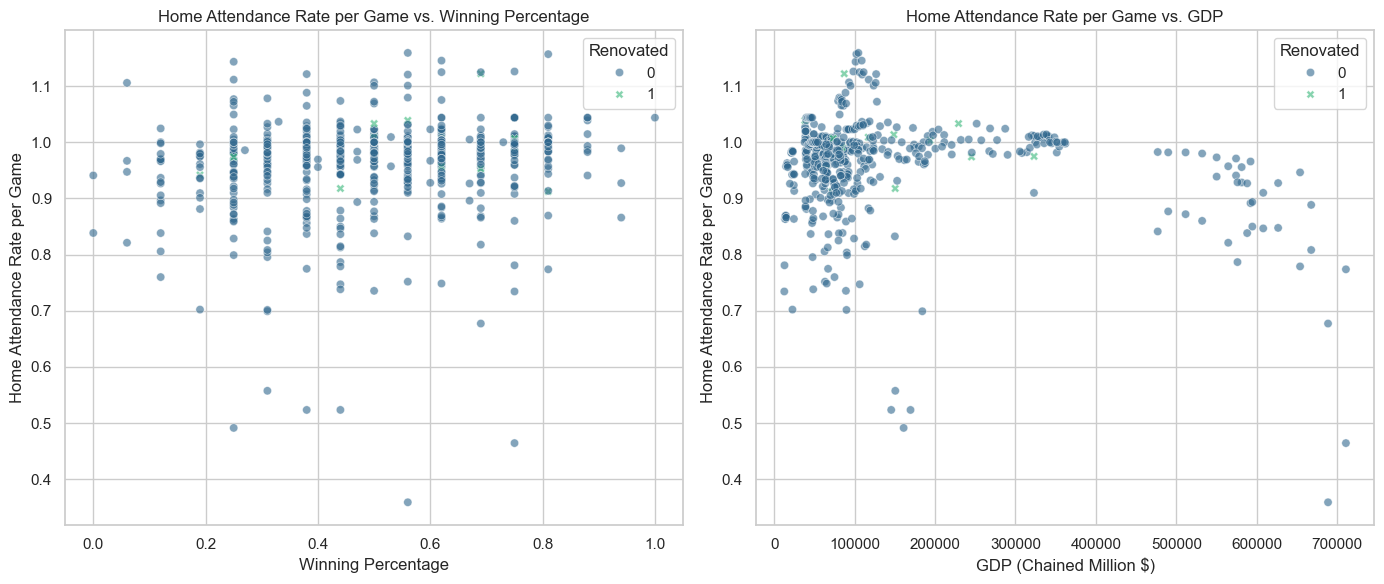

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Subplot 1: Home Attendance Rate per Game by Winning Percentage, colored by Renovation Status
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='win_percentage', y='home_attendance_rate_per_game', hue='renovated', style='renovated', palette='viridis', alpha=0.6)
plt.title('Home Attendance Rate per Game vs. Winning Percentage')
plt.xlabel('Winning Percentage')
plt.ylabel('Home Attendance Rate per Game')
plt.legend(title='Renovated')

# Subplot 2: Home Attendance Rate per Game by GDP, colored by Renovation Status
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='gdp_chained_million$', y='home_attendance_rate_per_game', hue='renovated', style='renovated', palette='viridis', alpha=0.6)
plt.title('Home Attendance Rate per Game vs. GDP')
plt.xlabel('GDP (Chained Million $)')
plt.ylabel('Home Attendance Rate per Game')
plt.legend(title='Renovated')

plt.tight_layout()
plt.show()

**Home Attendance Rate vs. Winning Percentage**

- This graph displays the relationship between team winning percentages and their home attendance rates, with differentiation based on whether the stadium has been renovated (0 for not renovated, 1 for renovated). The scatter plot suggests that higher winning percentages generally correlate with higher attendance rates, and renovated stadiums tend to cluster towards higher attendance rates, indicating the positive impact of both team performance and stadium upgrades on fan engagement.

**Home Attendance Rate vs. GDP**

- The second graph illustrates how home attendance rates relate to the GDP of the area, again differentiated by renovation status. While the relationship between GDP and attendance rates appears less direct, renovated stadiums are scattered across various GDP levels but often towards higher attendance rates. This suggests that while economic conditions (as represented by GDP) influence attendance rates, stadium renovations can positively impact attendance rates across different economic contexts.

## Synthesis

Synthesize the findings from your descriptive and inferential statistics along with your graphical analyses to answer your research questions.

Discuss how the combination of the datasets has provided added value in terms of insights or capabilities that would not be possible with the individual datasets in isolation.


## Documentation

Outline the steps you took in your analysis, providing the rationale for the choice of tools and techniques.

Clearly document your code, analyses, and interpretations so that they are understandable and reproducible.


## Reporting & Interpretation

Prepare markdown blocks that summarize your methodology, analysis, and findings.  You should intersperse these with your code.

Your notebook should be well-structured, with clear sections, headings, and subheadings.


## Reflection

Include a section (using one or more markdown blocks) at the end of your notebook in which you reflect on the process of analyzing the data. Discuss any challenges you encountered and how you overcame them.

Critically evaluate the limitations of your analysis and suggest areas for further research or improvement.
